# Laguerre-Gaussian fields in OSIRIS

Polarization is along x3. In OSIRIS, the maximum field value does not renormalize accounting for $\ell$ or $p$, but is always $a_0$.

Notebook by: Óscar Amaro (2022)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import pandas as pd
from scipy.special import factorial, genlaguerre
import h5py
from numpy import pi, log, sqrt, cos, sin, exp

import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np

def arraycenter(x):
    """
    returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

In [2]:
# import files
files = glob.glob('*.h5')
files.sort()

filef = h5py.File(files[0], 'r')

file_l0 = h5py.File('a10_W3_p0_ell0_e3.h5', 'r')['e3']
file_l1 = h5py.File('a10_W3_p1_ell0_e3.h5', 'r')['e3']
file_l2 = h5py.File('a10_W3_p2_ell0_e3.h5', 'r')['e3']
file_l3 = h5py.File('a10_W3_p3_ell0_e3.h5', 'r')['e3']

axis_l0f = h5py.File('a10_W3_p0_ell0_e3.h5', 'r')['AXIS']
axis_l0 = np.array( axis_l0f['AXIS3'] )

arr_l0 = np.array(file_l0)[100,:,1000]
arr_l1 = np.array(file_l1)[100,:,1000]
arr_l2 = np.array(file_l2)[100,:,1000]
arr_l3 = np.array(file_l3)[100,:,1000]
xlst = np.linspace(np.min(axis_l0),np.max(axis_l0),len(arr_l0))

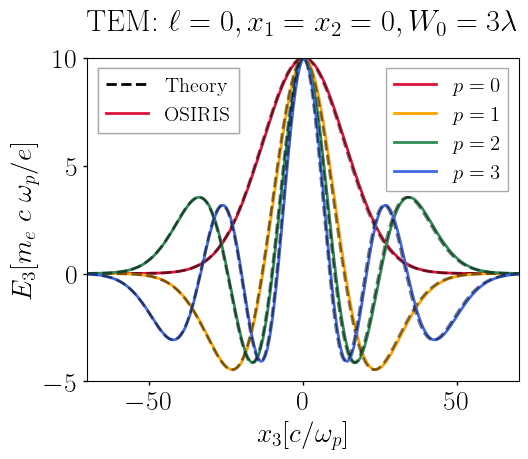

In [8]:
# plot 
plt.style.use("style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

x = xlst/18.85
po1, = plt.plot(xlst, arr_l0, color='crimson', label=r'$p=0$')
plt.plot(xlst, 10*np.exp(-x**2), 'k--', alpha=0.5 )
po2, = plt.plot(xlst, arr_l1, color='orange', label=r'$p=1$')
plt.plot(xlst, 10*np.exp(-x**2)*(1-2*x**2), 'k--', alpha=0.5 )
po3, = plt.plot(xlst, arr_l2, color='seagreen', label=r'$p=2$')
plt.plot(xlst, 10*np.exp(-x**2)*(1-4*x**2+2*x**4), 'k--', alpha=0.5 )
po4, = plt.plot(xlst, arr_l3, color='royalblue', label=r'$p=3$')
plt.plot(xlst, 10*np.exp(-x**2)*( 1/3*(3 - 18*x**2 + 18*x**4 - 4*x**6) ), 'k--', alpha=0.5 )

legend1 = plt.legend([po1,po2,po3,po4], [r'$p=0$',r'$p=1$',r'$p=2$',r'$p=3$'], loc='upper right')
plt.gca().add_artist(legend1)

plt.xlabel(r'$x_3[c/\omega_p]$')
plt.ylabel(r'$E_3[m_e ~c ~\omega_p /e]$')
#plt.legend(loc='upper right')
plt.xlim([-70,+70])
#plt.xlim([np.min(axis_l0),np.max(axis_l0)])
plt.ylim([-5,10])
plt.title(r'TEM: $\ell=0, x_1=x_2=0, W_0=3\lambda$')

p1, = plt.plot(xlst, xlst*0-20, 'k--' )
p2, = plt.plot(xlst, xlst*0-20, color='crimson' )
legend2 = plt.legend([p1,p2], ["Theory","OSIRIS"], loc='upper left')
plt.gca().add_artist(legend2)

axes.set_box_aspect(aspect=3/4)
plt.tight_layout()

plt.savefig('LG_ell0.pdf')
plt.show()

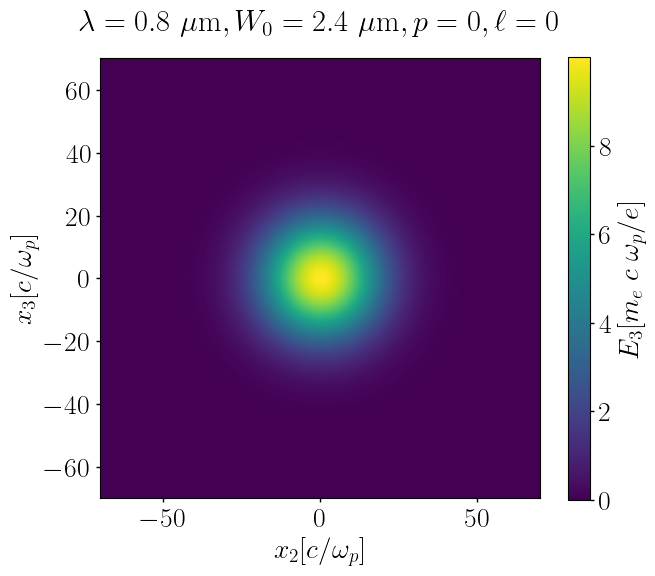

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
arr_l0_2d = np.array(file_l0)[:,:,1000]
plt.imshow(arr_l0_2d, extent=(-70, 70, -70, 70))
cbar = plt.colorbar()
plt.xlabel(r'$x_2[c/\omega_p]$')
plt.ylabel(r'$x_3[c/\omega_p]$')
plt.title(r'$\lambda=0.8~\mu\mathrm{m}, W_0=2.4~\mu\mathrm{m}, p=0, \ell=0$')
cbar.set_label(r'$E_3[m_e ~c ~\omega_p /e]$')
plt.tight_layout()
#plt.savefig('LG_p0_ell0.pdf')
plt.show()

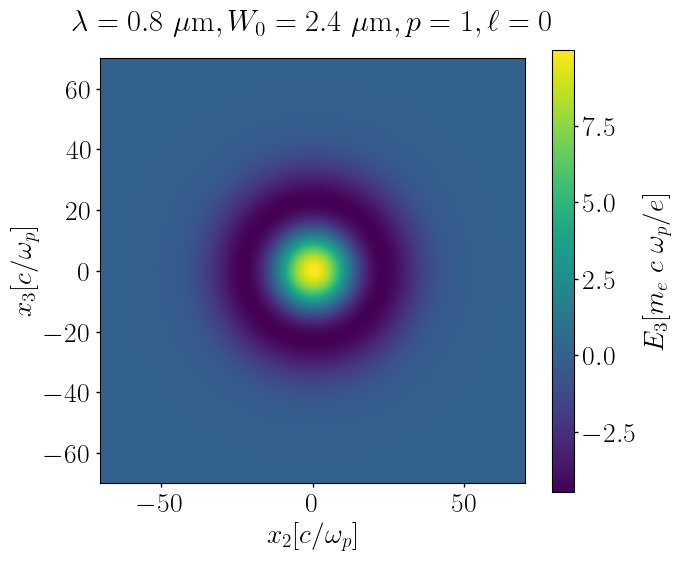

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
arr_l1_2d = np.array(file_l1)[:,:,1000]
plt.imshow(arr_l1_2d, extent=(-70, 70, -70, 70))
cbar = plt.colorbar()
plt.xlabel(r'$x_2[c/\omega_p]$')
plt.ylabel(r'$x_3[c/\omega_p]$')
plt.title(r'$\lambda=0.8~\mu\mathrm{m}, W_0=2.4~\mu\mathrm{m}, p=1, \ell=0$')
cbar.set_label(r'$E_3[m_e ~c ~\omega_p /e]$')
plt.tight_layout()
#plt.savefig('LG_p1_ell0.pdf')
plt.show()

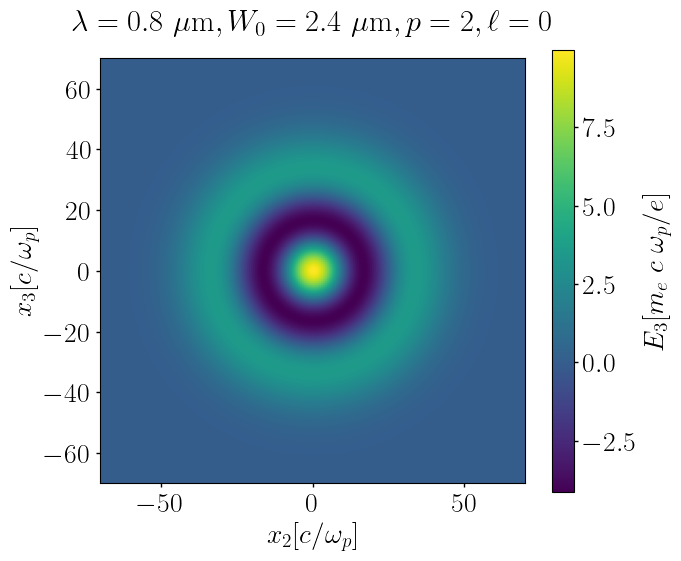

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
arr_l2_2d = np.array(file_l2)[:,:,1000]
plt.imshow(arr_l2_2d, extent=(-70, 70, -70, 70))
cbar = plt.colorbar()
plt.xlabel(r'$x_2[c/\omega_p]$')
plt.ylabel(r'$x_3[c/\omega_p]$')
plt.title(r'$\lambda=0.8~\mu\mathrm{m}, W_0=2.4~\mu\mathrm{m}, p=2, \ell=0$')
cbar.set_label(r'$E_3[m_e ~c ~\omega_p /e]$')
plt.tight_layout()
#plt.savefig('LG_p2_ell0.pdf')
plt.show()

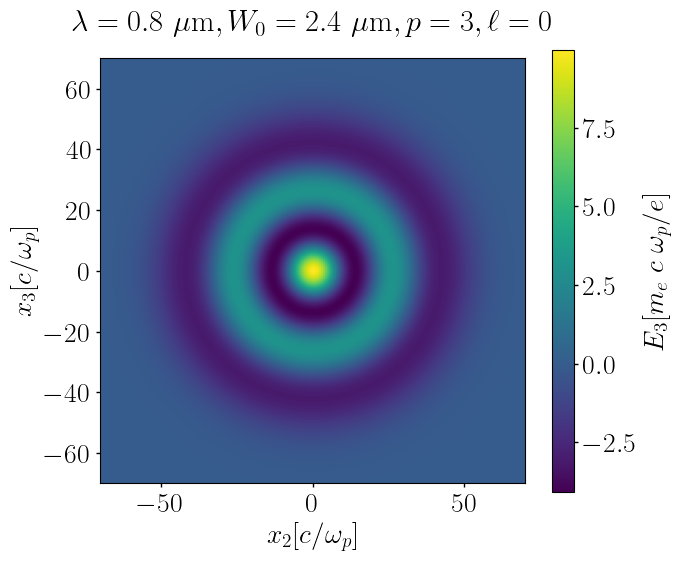

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
arr_l3_2d = np.array(file_l3)[:,:,1000]
plt.imshow(arr_l3_2d, extent=(-70, 70, -70, 70))
cbar = plt.colorbar()
plt.xlabel(r'$x_2[c/\omega_p]$')
plt.ylabel(r'$x_3[c/\omega_p]$')
plt.title(r'$\lambda=0.8~\mu\mathrm{m}, W_0=2.4~\mu\mathrm{m}, p=3, \ell=0$')
cbar.set_label(r'$E_3[m_e ~c ~\omega_p /e]$')
plt.tight_layout()
#plt.savefig('LG_p3_ell0.pdf')
plt.show()